In [1]:
import scanpy as sc

In [2]:
import celltypist
from celltypist import models

In [3]:
adata = sc.read_h5ad("/Users/hauke//Desktop/T2D_Myeloid/data/Corrected_Myeloid.h5ad")

In [4]:
adata.shape

(8509, 43086)

In [5]:
adata.var

,vf_vst_counts.CV7320_mean,vf_vst_counts.CV7320_variance,vf_vst_counts.CV7320_variance.expected,vf_vst_counts.CV7320_variance.standardized,vf_vst_counts.CV7320_variable,vf_vst_counts.CV7320_rank,vf_vst_counts.one_mean,vf_vst_counts.one_variance,vf_vst_counts.one_variance.expected,vf_vst_counts.one_variance.standardized,...,vf_vst_counts.seven_variable,vf_vst_counts.seven_rank,vf_vst_counts.eight_mean,vf_vst_counts.eight_variance,vf_vst_counts.eight_variance.expected,vf_vst_counts.eight_variance.standardized,vf_vst_counts.eight_variable,vf_vst_counts.eight_rank,var.features,var.features.rank
MIR1302-2HG,0.0,0.0,0.0,0.0,False,-2147483648,0.0,0.0,0.0,0.0,...,False,-2147483648,0.000000,0.000000,0.000000,0.00000,False,-2147483648,NaN,-2147483648
FAM138A,0.0,0.0,0.0,0.0,False,-2147483648,0.0,0.0,0.0,0.0,...,False,-2147483648,0.000000,0.000000,0.000000,0.00000,False,-2147483648,NaN,-2147483648
OR4F5,0.0,0.0,0.0,0.0,False,-2147483648,0.0,0.0,0.0,0.0,...,False,-2147483648,0.000000,0.000000,0.000000,0.00000,False,-2147483648,NaN,-2147483648
AL627309.1,0.0,0.0,0.0,0.0,False,-2147483648,0.0,0.0,0.0,0.0,...,False,-2147483648,0.000000,0.000000,0.000000,0.00000,False,-2147483648,NaN,-2147483648
AL627309.3,0.0,0.0,0.0,0.0,False,-2147483648,0.0,0.0,0.0,0.0,...,False,-2147483648,0.000000,0.000000,0.000000,0.00000,False,-2147483648,NaN,-2147483648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC011840.1,0.0,0.0,0.0,0.0,False,-2147483648,0.0,0.0,0.0,0.0,...,False,-2147483648,0.000000,0.000000,0.000000,0.00000,False,-2147483648,NaN,-2147483648
AC020911.3,0.0,0.0,0.0,0.0,False,-2147483648,0.0,0.0,0.0,0.0,...,False,-2147483648,0.003717,0.003717,0.003718,0.99989,False,-2147483648,NaN,-2147483648
U62631.1,0.0,0.0,0.0,0.0,False,-2147483648,0.0,0.0,0.0,0.0,...,False,-2147483648,0.000000,0.000000,0.000000,0.00000,False,-2147483648,NaN,-2147483648
AP000553.9,0.0,0.0,0.0,0.0,False,-2147483648,0.0,0.0,0.0,0.0,...,False,-2147483648,0.000000,0.000000,0.000000,0.00000,False,-2147483648,NaN,-2147483648


In [6]:
adata.X.expm1().sum(axis = 1)

matrix([[10000.],
        [10000.],
        [10000.],
        ...,
        [10000.],
        [10000.],
        [10000.]])

In [7]:
adata.obs

,nCount_RNA,nFeature_RNA,conditions,study,bmi,Carotid_stenosis,Pat_ID,combined_ID,percent.mt,percent.rps,percent.rpl,cca_clusters,seurat_clusters,rpca_clusters,harmony_clusters,mnn_clusters,scvi_clusters
G_AAAGATGGTCTGCAAT-1,14608.0,3278,ND,G,lean,Symptomatic,CV7225,G_CV7225_ND,4.100493,9.412651,12.821742,11,9,17,9,9,9
G_AACTCTTGTCGGGTCT-1,779.0,424,ND,G,lean,Symptomatic,CV7225,G_CV7225_ND,0.000000,4.621309,6.931964,3,3,3,3,3,3
G_AACTTTCGTCCTGCTT-1,4362.0,1325,ND,G,lean,Symptomatic,CV7225,G_CV7225_ND,3.943145,13.801009,20.197157,1,9,17,9,9,9
G_AAGCCGCCATGCCTTC-1,5877.0,1461,ND,G,lean,Symptomatic,CV7225,G_CV7225_ND,2.654416,9.954058,14.224945,5,18,10,18,18,18
G_AAGGTTCAGCACGCCT-1,6510.0,1478,ND,G,lean,Symptomatic,CV7225,G_CV7225_ND,2.273425,7.680492,10.721966,9,6,4,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H_eight_TTGGCAACAGCCACCA.1,12248.0,3503,ND,H,NaN,NaN,eight,H_eight_ND,0.922600,12.516329,16.067929,12,2,5,2,2,2
H_eight_TTGTAGGTCTCCAGGG.1,12608.0,3078,ND,H,NaN,NaN,eight,H_eight_ND,2.054251,9.835025,14.141815,5,4,2,4,4,4
H_eight_TTTACTGAGGGTTTCT.1,8933.0,2806,ND,H,NaN,NaN,eight,H_eight_ND,3.156834,6.627113,9.694392,1,5,1,5,5,5
H_eight_TTTCCTCAGCGTAGTG.1,3210.0,1508,ND,H,NaN,NaN,eight,H_eight_ND,6.012461,3.862928,5.295950,1,10,13,10,10,10


In [8]:
# Enabling `force_update = True` will overwrite existing (old) models.
models.download_models(force_update = True)

📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 48
📂 Storing models in /Users/hauke/.celltypist/data/models
💾 Downloading model [1/48]: Immune_All_Low.pkl
💾 Downloading model [2/48]: Immune_All_High.pkl
💾 Downloading model [3/48]: Adult_CynomolgusMacaque_Hippocampus.pkl
💾 Downloading model [4/48]: Adult_Human_PancreaticIslet.pkl
💾 Downloading model [5/48]: Adult_Human_Skin.pkl
💾 Downloading model [6/48]: Adult_Mouse_Gut.pkl
💾 Downloading model [7/48]: Adult_Mouse_OlfactoryBulb.pkl
💾 Downloading model [8/48]: Adult_Pig_Hippocampus.pkl
💾 Downloading model [9/48]: Adult_RhesusMacaque_Hippocampus.pkl
💾 Downloading model [10/48]: Autopsy_COVID19_Lung.pkl
💾 Downloading model [11/48]: COVID19_HumanChallenge_Blood.pkl
💾 Downloading model [12/48]: COVID19_Immune_Landscape.pkl
💾 Downloading model [13/48]: Cells_Adult_Breast.pkl
💾 Downloading model [14/48]: Cells_Fetal_Lung.pkl
💾 Downloading model [15/48]: Cells_Human_Tonsil.pkl
💾

In [9]:
# Indeed, the `model` argument defaults to `Immune_All_Low.pkl`.
model = models.Model.load(model = 'Immune_All_Low.pkl')

In [10]:
model

CellTypist model with 98 cell types and 6639 features
    date: 2022-07-16 00:20:42.927778
    details: immune sub-populations combined from 20 tissues of 18 studies
    source: https://doi.org/10.1126/science.abl5197
    version: v2
    cell types: Age-associated B cells, Alveolar macrophages, ..., pDC precursor
    features: A1BG, A2M, ..., ZYX

In [11]:
model.cell_types

array(['Age-associated B cells', 'Alveolar macrophages', 'B cells',
       'CD16+ NK cells', 'CD16- NK cells', 'CD8a/a', 'CD8a/b(entry)',
       'CMP', 'CRTAM+ gamma-delta T cells', 'Classical monocytes',
       'Cycling B cells', 'Cycling DCs', 'Cycling NK cells',
       'Cycling T cells', 'Cycling gamma-delta T cells',
       'Cycling monocytes', 'DC', 'DC precursor', 'DC1', 'DC2', 'DC3',
       'Double-negative thymocytes', 'Double-positive thymocytes', 'ELP',
       'ETP', 'Early MK', 'Early erythroid', 'Early lymphoid/T lymphoid',
       'Endothelial cells', 'Epithelial cells', 'Erythrocytes',
       'Erythrophagocytic macrophages', 'Fibroblasts',
       'Follicular B cells', 'Follicular helper T cells', 'GMP',
       'Germinal center B cells', 'Granulocytes', 'HSC/MPP',
       'Hofbauer cells', 'ILC', 'ILC precursor', 'ILC1', 'ILC2', 'ILC3',
       'Intermediate macrophages', 'Intestinal macrophages',
       'Kidney-resident macrophages', 'Kupffer cells',
       'Large pre-B cell

In [12]:
# Not run; predict cell identities using this loaded model.
#predictions = celltypist.annotate(adata_2000, model = model, majority_voting = True)
# Alternatively, just specify the model name (recommended as this ensures the model is intact every time it is loaded).
predictions = celltypist.annotate(adata, model = model, majority_voting = True)

🔬 Input data has 8509 cells and 43086 genes
🔗 Matching reference genes in the model
🧬 6404 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


In [13]:
# Get an `AnnData` with predicted labels embedded into the cell metadata columns.
adata = predictions.to_adata()

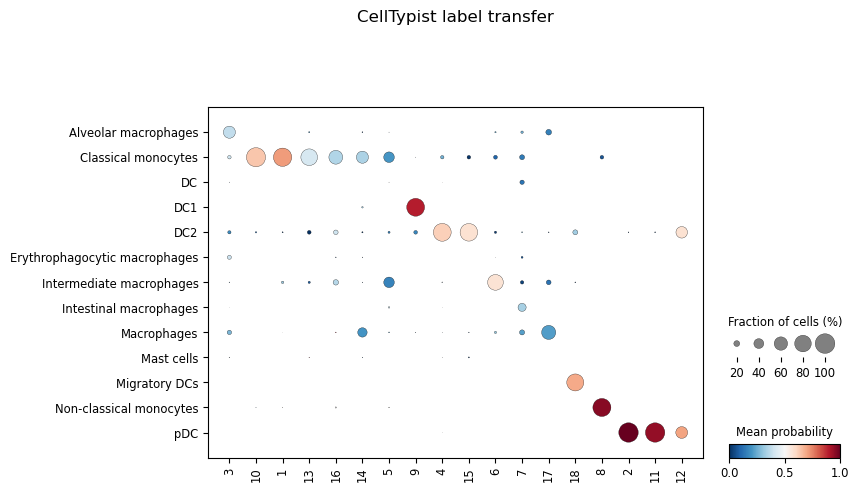

In [14]:
celltypist.dotplot(predictions, use_as_reference = 'harmony_clusters', use_as_prediction = 'majority_voting')

In [15]:
adata.obs

,nCount_RNA,nFeature_RNA,conditions,study,bmi,Carotid_stenosis,Pat_ID,combined_ID,percent.mt,percent.rps,...,cca_clusters,seurat_clusters,rpca_clusters,harmony_clusters,mnn_clusters,scvi_clusters,predicted_labels,over_clustering,majority_voting,conf_score
G_AAAGATGGTCTGCAAT-1,14608.0,3278,ND,G,lean,Symptomatic,CV7225,G_CV7225_ND,4.100493,9.412651,...,11,9,17,9,9,9,DC1,74,Macrophages,0.055636
G_AACTCTTGTCGGGTCT-1,779.0,424,ND,G,lean,Symptomatic,CV7225,G_CV7225_ND,0.000000,4.621309,...,3,3,3,3,3,3,Alveolar macrophages,58,Macrophages,0.453090
G_AACTTTCGTCCTGCTT-1,4362.0,1325,ND,G,lean,Symptomatic,CV7225,G_CV7225_ND,3.943145,13.801009,...,1,9,17,9,9,9,Classical monocytes,16,Classical monocytes,0.018434
G_AAGCCGCCATGCCTTC-1,5877.0,1461,ND,G,lean,Symptomatic,CV7225,G_CV7225_ND,2.654416,9.954058,...,5,18,10,18,18,18,Migratory DCs,76,Migratory DCs,0.993403
G_AAGGTTCAGCACGCCT-1,6510.0,1478,ND,G,lean,Symptomatic,CV7225,G_CV7225_ND,2.273425,7.680492,...,9,6,4,6,6,6,Macrophages,28,Intermediate macrophages,0.823976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H_eight_TTGGCAACAGCCACCA.1,12248.0,3503,ND,H,NaN,NaN,eight,H_eight_ND,0.922600,12.516329,...,12,2,5,2,2,2,pDC,68,pDC,1.000000
H_eight_TTGTAGGTCTCCAGGG.1,12608.0,3078,ND,H,NaN,NaN,eight,H_eight_ND,2.054251,9.835025,...,5,4,2,4,4,4,DC2,59,DC2,0.999993
H_eight_TTTACTGAGGGTTTCT.1,8933.0,2806,ND,H,NaN,NaN,eight,H_eight_ND,3.156834,6.627113,...,1,5,1,5,5,5,Intermediate macrophages,62,Intermediate macrophages,0.116293
H_eight_TTTCCTCAGCGTAGTG.1,3210.0,1508,ND,H,NaN,NaN,eight,H_eight_ND,6.012461,3.862928,...,1,10,13,10,10,10,Classical monocytes,15,Classical monocytes,0.983729


In [16]:
adata.write_h5ad("/Users/hauke//Desktop/T2D_Myeloid/data/CellTypist_Myeloid.h5ad")